In [2]:
from matplotlib import image
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
import numpy as np
import requests
import os

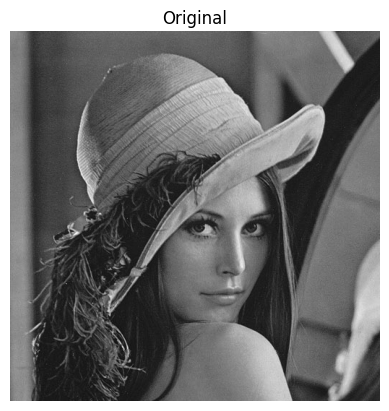

In [3]:
# Getting Image
img_path = "archive/lena.gray.bmp"
img = Image.open(img_path)
plt.axis('off')
plt.title('Original')
plt.imshow(img, cmap='gray')

In [4]:
# Getting the Matrix
matrix = np.array(img)
u, s, vt = np.linalg.svd(matrix, full_matrices = False)

print(f'U:{u.shape}\n{u}\nS:{s.shape}\n{s}\nVT:{vt.shape}\n{vt}\n')

U:(512, 512)
[[-0.0465552  -0.02797083 -0.01205808 ... -0.01205472  0.02031066
   0.01293795]
 [-0.04651241 -0.02782373 -0.0106857  ...  0.04356885 -0.03548333
  -0.01053832]
 [-0.04638252 -0.02789116 -0.0101193  ... -0.03988263 -0.0598304
  -0.03590254]
 ...
 [-0.04016495 -0.03746758  0.05621197 ... -0.15632173  0.0276212
  -0.02680132]
 [-0.03999963 -0.03835767  0.05324906 ...  0.0514829  -0.02643346
   0.05767003]
 [-0.04008392 -0.03869813  0.05221379 ...  0.03061823 -0.02241974
  -0.0625578 ]]
S:(512,)
[5.04617916e+04 9.17549579e+03 7.64267648e+03 5.95377501e+03
 5.49467677e+03 5.03153061e+03 3.99760007e+03 3.42490325e+03
 3.00197390e+03 2.72643299e+03 2.38560207e+03 2.25364651e+03
 2.15916230e+03 2.03360869e+03 1.94905633e+03 1.77384496e+03
 1.60169146e+03 1.55487477e+03 1.48126226e+03 1.40369419e+03
 1.34496189e+03 1.28331416e+03 1.25788408e+03 1.21821642e+03
 1.13201908e+03 1.06738389e+03 1.05922983e+03 1.03475544e+03
 1.00184013e+03 9.72774287e+02 9.64610187e+02 9.25783736e+02


In [5]:
# Graph to Compare Singular Values and Image Size (JPEGs)
img_sizes_jpeg = []
singular_values_jpeg = []
for i in range(0, 513):
    w = s.copy()
    w[i:] = 0
    denoised_multiple = u @ np.diag(w) @ vt

    denoised_file = Image.fromarray(denoised_multiple)
    rgb_denoised_multiple = denoised_file.convert('RGB')
    if not os.path.exists(f'Denoised_Images_JPEG/denoised_{i}.jpeg'):
        rgb_denoised_multiple.save(f'Denoised_Images_JPEG/denoised_{i}.jpeg', 'JPEG')

    img_sizes_jpeg.append(os.stat(f'Denoised_Images_JPEG/denoised_{i}.jpeg').st_size/100)
    singular_values_jpeg.append(i)


In [6]:
# Graph to Compare Singular Values and Image Size (PNG)
img_sizes_png = []
singular_values_png = []
for i in range(0, 513):
    w = s.copy()
    w[i:] = 0
    denoised_multiple = u @ np.diag(w) @ vt

    denoised_file = Image.fromarray(denoised_multiple)
    rgb_denoised_multiple = denoised_file.convert('RGB')
    if not os.path.exists(f'Denoised_Images_PNG/denoised_{i}.png'):
        rgb_denoised_multiple.save(f'Denoised_Images_PNG/denoised_{i}.png', 'JPEG')

    img_sizes_png.append(os.stat(f'Denoised_Images_PNG/denoised_{i}.png').st_size/100)
    singular_values_png.append(i)


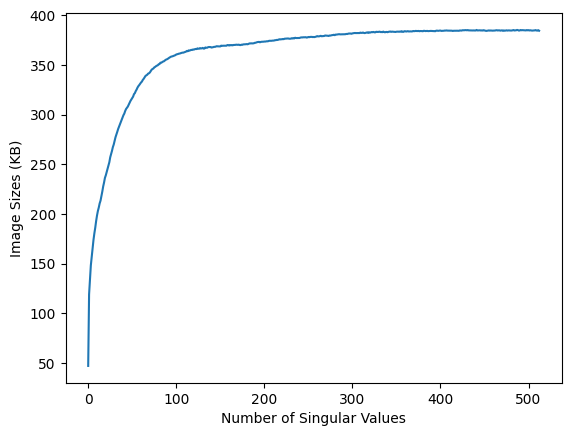

In [11]:
# The Actual Graph (JPEG)
plt.plot(singular_values_jpeg, img_sizes_jpeg)
plt.ylabel('Image Sizes (KB)')
plt.xlabel('Number of Singular Values')
#plt.title('Image Sizes vs Singular Values (JPEG)')
plt.show()

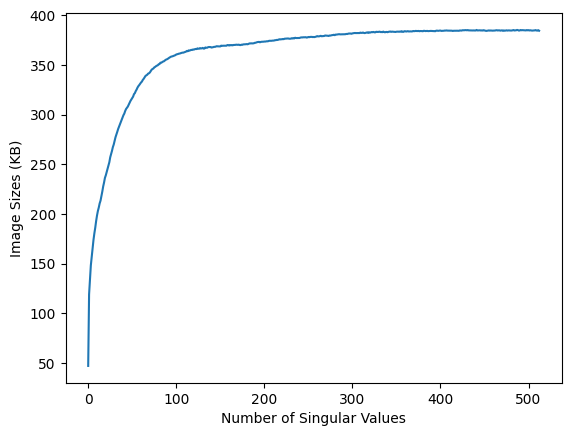

In [12]:
# The Actual Graph (PNG)
plt.plot(singular_values_png, img_sizes_png)
plt.ylabel('Image Sizes (KB)')
plt.xlabel('Number of Singular Values')
#plt.title('Image Sizes vs Singular Values (PNG)')
plt.show()

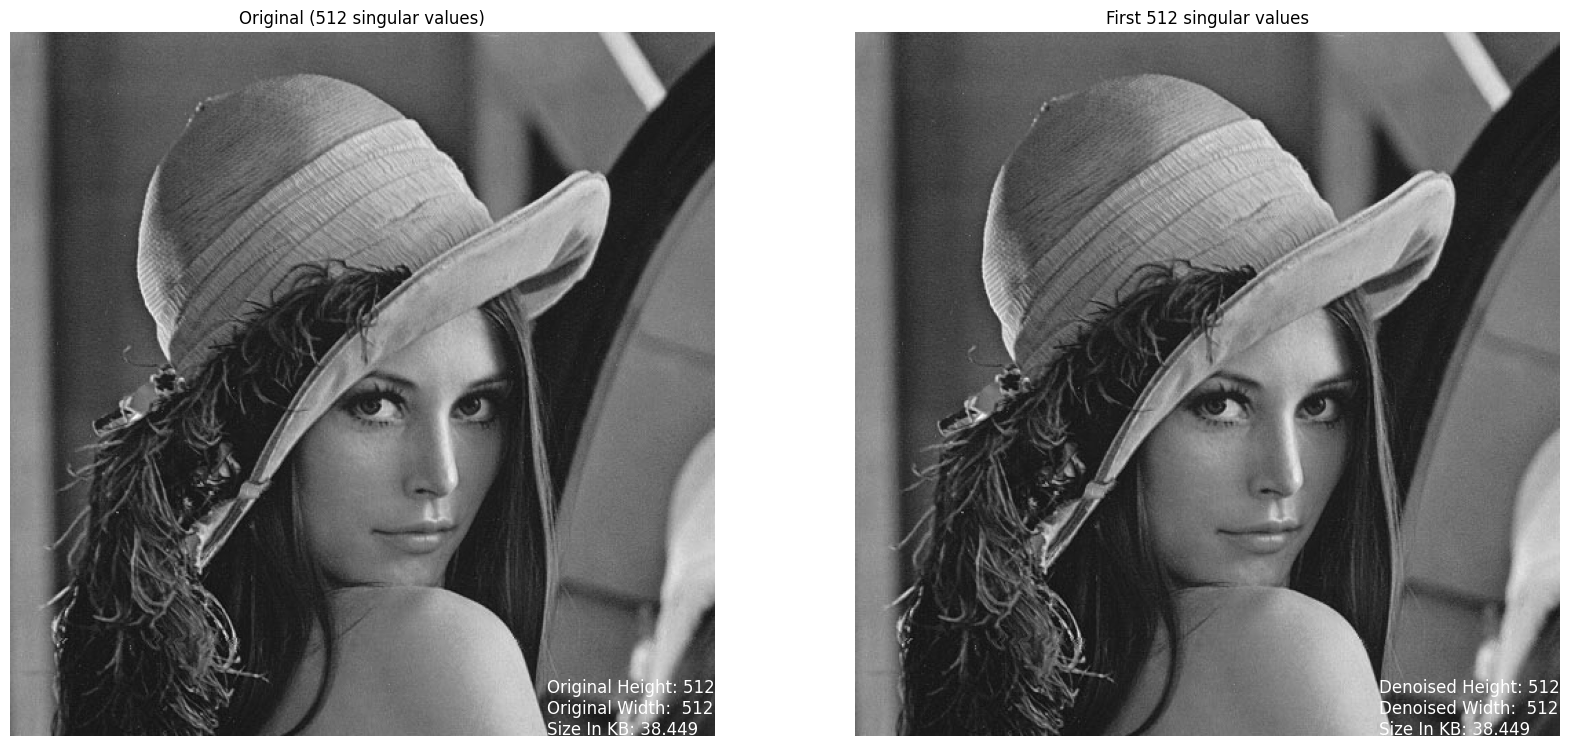

In [9]:
# Image Denoising
N = 512  # Number of singular values
s[N:]= 0
denoised = u @ np.diag(s) @ vt

rgb_img = img.convert('RGB')
rgb_img.save('original_new.jpeg')

h, w = img.size

denoised_img = Image.fromarray(denoised)
rgb_denoised = denoised_img.convert('RGB')
rgb_denoised.save('denoised_new.jpeg')
hh, ww = denoised_img.size

denoised_size = os.stat("denoised_new.jpeg").st_size
original_size = os.stat("original_new.jpeg").st_size

plt.figure(figsize=(20, 25))
plt.subplot(1, 2, 1)
plt.title(f'Original (512 singular values)')
plt.text(390, 510, f'Original Height: {h}\nOriginal Width:  {w}\nSize In KB: {original_size/1000}', color = 'w', fontsize = 12)
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title(f'First {N} singular values')
plt.text(380, 510, f'Denoised Height: {hh}\nDenoised Width:  {ww}\nSize In KB: {denoised_size/1000}', color = 'w', fontsize = 12)
plt.axis('off')
plt.imshow(denoised, cmap = 'gray')


Text(0, 0.5, 'Largest Singular Value')

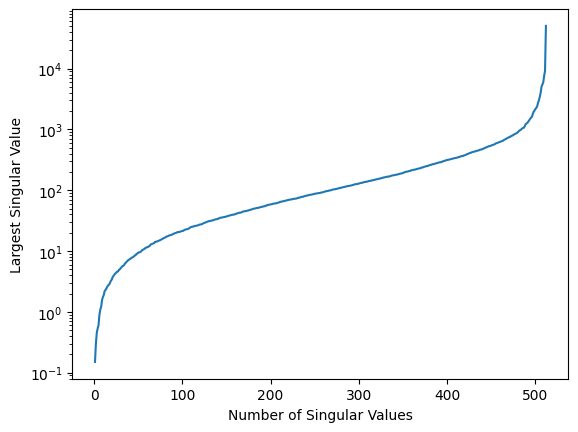

In [10]:
num_svs = []
svs_value = []

for i in range(0,512):
    e = s.copy()
    svs_value.append(e[i:][0])
    num_svs.insert(i, 512-i)


plt.plot(num_svs, svs_value)
plt.yscale("log")
plt.xlabel("Number of Singular Values")
plt.ylabel("Largest Singular Value")